In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
tf.random.set_seed(2005)
np.random.seed(2005)

In [32]:
digits = fetch_openml('mnist_784', version=1)
X = np.array(digits.data.astype(np.float32)) / 255.0
y = np.array(digits.target.astype(np.int32))

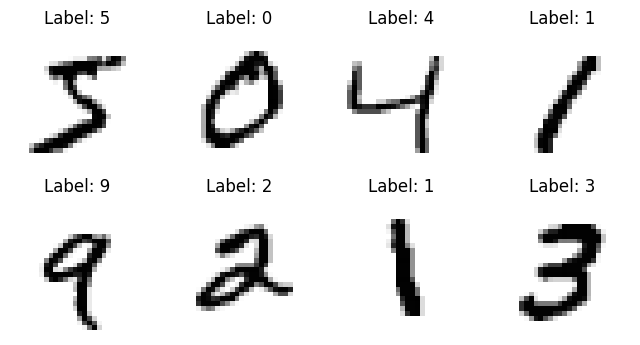

In [33]:
plt.figure(figsize=(8, 4))
for index in range(8):
    plt.subplot(2, 4, index + 1)
    plt.imshow(X[index].reshape(28, 28), cmap=plt.cm.gray_r)
    plt.title(f"Label: {y[index]}")
    plt.axis('off')
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2005)

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Flatten(name="input"),
    tf.keras.layers.Dense(128, activation='relu', name="h_128"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', name="h_64"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax', name="output")
])

In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
class WeightTableLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nЭпоха {epoch + 1} - Таблицы весов:")
        for layer in self.model.layers:
            weights = layer.get_weights()
            if weights:  # Если слой имеет веса
                weight_matrix = weights[0]
                bias_vector = weights[1]
                print(f"\nСлой: {layer.name}")
                df_weights = pd.DataFrame(weight_matrix)
                print("Матрица весов:")
                print(df_weights.head())
                df_bias = pd.DataFrame(bias_vector, columns=["Смещение"])
                print("Вектор смещений:")
                print(df_bias.to_string())

In [38]:
class NeuronVisualizer(tf.keras.callbacks.Callback):
    def __init__(self, num_neurons=8):
        super().__init__()
        self.num_neurons = num_neurons

    def on_epoch_end(self, epoch, logs=None):
        weights = self.model.get_layer("h_128").get_weights()[0]
        plt.figure(figsize=(8, 4))
        for i in range(self.num_neurons):
            plt.subplot(2, 4, i + 1)
            neuron_weights = weights[:, i].reshape(28, 28)
            plt.imshow(neuron_weights, cmap='viridis')
            plt.title(f"Эпоха {epoch + 1}, Нейрон {i}")
            plt.axis('off')
        plt.tight_layout()
        plt.show()

In [39]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
weight_logger = WeightTableLogger()
neuron_visualizer = NeuronVisualizer(num_neurons=8)

Epoch 1/20
403/438 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7939 - loss: 0.6766
Эпоха 1 - Таблицы весов:

Слой: h_128
Матрица весов:
        0         1         2         3         4         5         6    \
0  0.040833  0.006769  0.053378  0.014670 -0.043691  0.046577 -0.012092   
1  0.036694 -0.004013 -0.044545  0.031292  0.009765  0.078405  0.024457   
2  0.040159  0.080075  0.001007  0.050227 -0.080195 -0.061896  0.002116   
3  0.075266 -0.027484  0.069151 -0.069895  0.079566  0.006785 -0.046291   
4  0.051493 -0.042883  0.029019 -0.049312  0.069005  0.061613 -0.004877   

        7         8         9    ...       118       119       120       121  \
0 -0.014228 -0.018582 -0.037774  ...  0.015626 -0.067553  0.052906 -0.037754   
1  0.033160  0.054840  0.050886  ... -0.013101 -0.043395  0.080793  0.041851   
2  0.032615  0.001453  0.023004  ...  0.072915  0.077124 -0.072914 -0.045269   
3  0.026631 -0.033249 -0.032067  ...  0.044475 -0.046907 -0.044013  0.058731   
4  0.04423

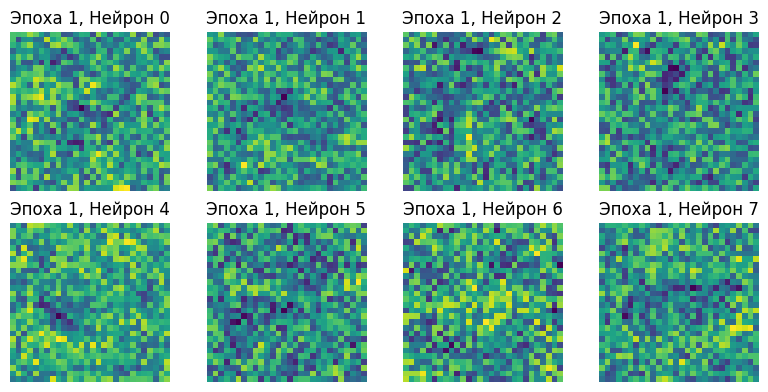

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8014 - loss: 0.6529 - val_accuracy: 0.9503 - val_loss: 0.1645 - learning_rate: 0.0010
Epoch 2/20
432/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9445 - loss: 0.1892
Эпоха 2 - Таблицы весов:

Слой: h_128
Матрица весов:
        0         1         2         3         4         5         6    \
0  0.040833  0.006769  0.053378  0.014670 -0.043691  0.046577 -0.012092   
1  0.036694 -0.004013 -0.044545  0.031292  0.009765  0.078405  0.024457   
2  0.040159  0.080075  0.001007  0.050227 -0.080195 -0.061896  0.002116   
3  0.075266 -0.027484  0.069151 -0.069895  0.079566  0.006785 -0.046291   
4  0.051493 -0.042883  0.029019 -0.049312  0.069005  0.061613 -0.004877   

        7         8         9    ...       118       119       120       121  \
0 -0.014228 -0.018582 -0.037774  ...  0.015626 -0.067553  0.052906 -0.037754   
1  0.033160  0.054840  0.050886  ... -0.013101 -0.043395  0.080793  0.041851   
2  0.032615  0.001453  0.0230

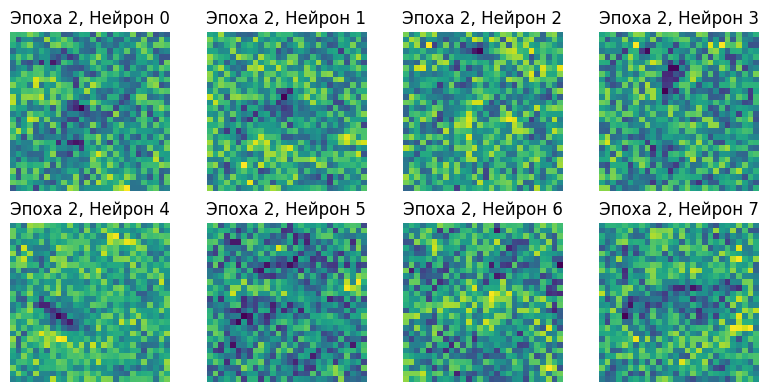

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9446 - loss: 0.1890 - val_accuracy: 0.9619 - val_loss: 0.1226 - learning_rate: 0.0010
Epoch 3/20
416/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9581 - loss: 0.1433
Эпоха 3 - Таблицы весов:

Слой: h_128
Матрица весов:
        0         1         2         3         4         5         6    \
0  0.040833  0.006769  0.053378  0.014670 -0.043691  0.046577 -0.012092   
1  0.036694 -0.004013 -0.044545  0.031292  0.009765  0.078405  0.024457   
2  0.040159  0.080075  0.001007  0.050227 -0.080195 -0.061896  0.002116   
3  0.075266 -0.027484  0.069151 -0.069895  0.079566  0.006785 -0.046291   
4  0.051493 -0.042883  0.029019 -0.049312  0.069005  0.061613 -0.004877   

        7         8         9    ...       118       119       120       121  \
0 -0.014228 -0.018582 -0.037774  ...  0.015626 -0.067553  0.052906 -0.037754   
1  0.033160  0.054840  0.050886  ... -0.013101 -0.043395  0.080793  0.041851   
2  0.032615  0.001453  0.0230

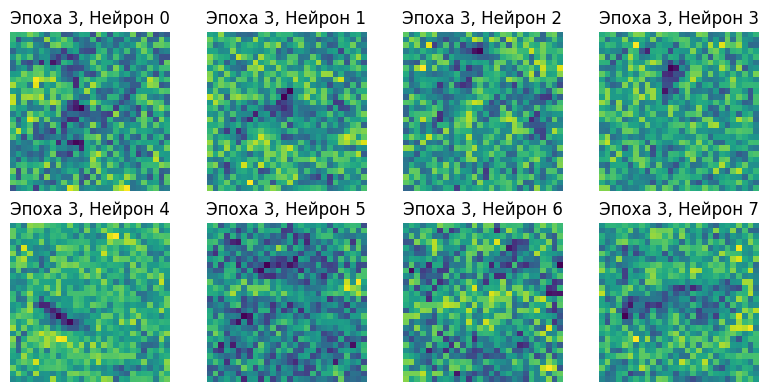

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9582 - loss: 0.1428 - val_accuracy: 0.9651 - val_loss: 0.1135 - learning_rate: 0.0010
Epoch 4/20
418/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9641 - loss: 0.1179
Эпоха 4 - Таблицы весов:

Слой: h_128
Матрица весов:
        0         1         2         3         4         5         6    \
0  0.040833  0.006769  0.053378  0.014670 -0.043691  0.046577 -0.012092   
1  0.036694 -0.004013 -0.044545  0.031292  0.009765  0.078405  0.024457   
2  0.040159  0.080075  0.001007  0.050227 -0.080195 -0.061896  0.002116   
3  0.075266 -0.027484  0.069151 -0.069895  0.079566  0.006785 -0.046291   
4  0.051493 -0.042883  0.029019 -0.049312  0.069005  0.061613 -0.004877   

        7         8         9    ...       118       119       120       121  \
0 -0.014228 -0.018582 -0.037774  ...  0.015626 -0.067553  0.052906 -0.037754   
1  0.033160  0.054840  0.050886  ... -0.013101 -0.043395  0.080793  0.041851   
2  0.032615  0.001453  0.0230

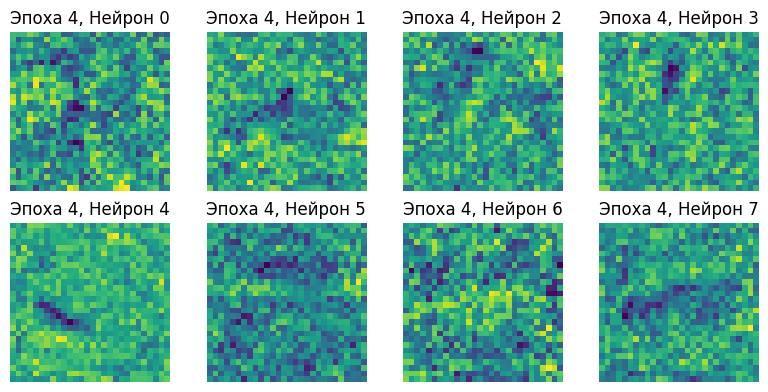

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9642 - loss: 0.1175 - val_accuracy: 0.9696 - val_loss: 0.0978 - learning_rate: 0.0010
Epoch 5/20
417/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9681 - loss: 0.1016
Эпоха 5 - Таблицы весов:

Слой: h_128
Матрица весов:
        0         1         2         3         4         5         6    \
0  0.040833  0.006769  0.053378  0.014670 -0.043691  0.046577 -0.012092   
1  0.036694 -0.004013 -0.044545  0.031292  0.009765  0.078405  0.024457   
2  0.040159  0.080075  0.001007  0.050227 -0.080195 -0.061896  0.002116   
3  0.075266 -0.027484  0.069151 -0.069895  0.079566  0.006785 -0.046291   
4  0.051493 -0.042883  0.029019 -0.049312  0.069005  0.061613 -0.004877   

        7         8         9    ...       118       119       120       121  \
0 -0.014228 -0.018582 -0.037774  ...  0.015626 -0.067553  0.052906 -0.037754   
1  0.033160  0.054840  0.050886  ... -0.013101 -0.043395  0.080793  0.041851   
2  0.032615  0.001453  0.0230

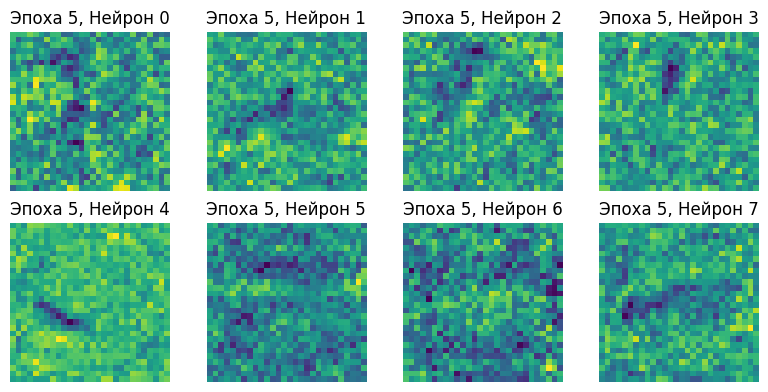

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9682 - loss: 0.1012 - val_accuracy: 0.9711 - val_loss: 0.0965 - learning_rate: 0.0010
Epoch 6/20
418/438 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9718 - loss: 0.0890
Эпоха 6 - Таблицы весов:

Слой: h_128
Матрица весов:
        0         1         2         3         4         5         6    \
0  0.040833  0.006769  0.053378  0.014670 -0.043691  0.046577 -0.012092   
1  0.036694 -0.004013 -0.044545  0.031292  0.009765  0.078405  0.024457   
2  0.040159  0.080075  0.001007  0.050227 -0.080195 -0.061896  0.002116   
3  0.075266 -0.027484  0.069151 -0.069895  0.079566  0.006785 -0.046291   
4  0.051493 -0.042883  0.029019 -0.049312  0.069005  0.061613 -0.004877   

        7         8         9    ...       118       119       120       121  \
0 -0.014228 -0.018582 -0.037774  ...  0.015626 -0.067553  0.052906 -0.037754   
1  0.033160  0.054840  0.050886  ... -0.013101 -0.043395  0.080793  0.041851   
2  0.032615  0.001453  0.0230

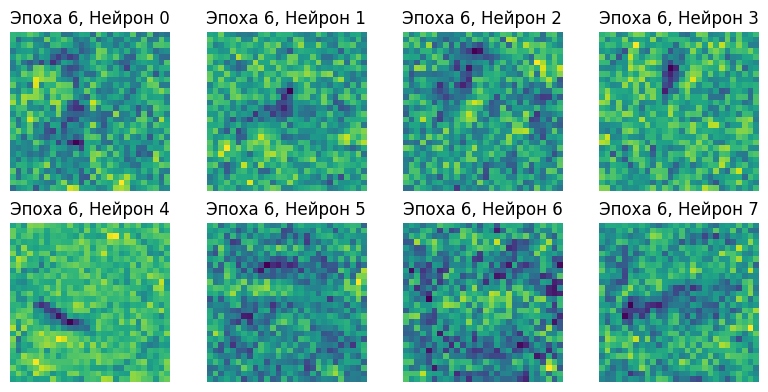

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9719 - loss: 0.0888 - val_accuracy: 0.9729 - val_loss: 0.0891 - learning_rate: 0.0010
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9748 - loss: 0.0802
Эпоха 7 - Таблицы весов:

Слой: h_128
Матрица весов:
        0         1         2         3         4         5         6    \
0  0.040833  0.006769  0.053378  0.014670 -0.043691  0.046577 -0.012092   
1  0.036694 -0.004013 -0.044545  0.031292  0.009765  0.078405  0.024457   
2  0.040159  0.080075  0.001007  0.050227 -0.080195 -0.061896  0.002116   
3  0.075266 -0.027484  0.069151 -0.069895  0.079566  0.006785 -0.046291   
4  0.051493 -0.042883  0.029019 -0.049312  0.069005  0.061613 -0.004877   

        7         8         9    ...       118       119       120       121  \
0 -0.014228 -0.018582 -0.037774  ...  0.015626 -0.067553  0.052906 -0.037754   
1  0.033160  0.054840  0.050886  ... -0.013101 -0.043395  0.080793  0.041851   
2  0.032615  0.001453  0.0230

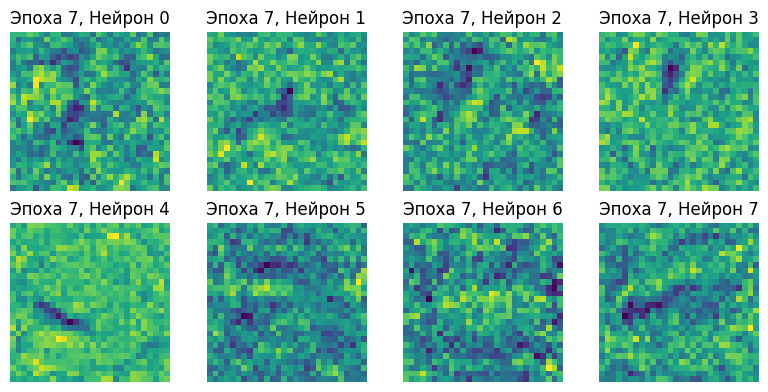

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9748 - loss: 0.0802 - val_accuracy: 0.9749 - val_loss: 0.0837 - learning_rate: 0.0010
Epoch 8/20
413/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9783 - loss: 0.0683
Эпоха 8 - Таблицы весов:

Слой: h_128
Матрица весов:
        0         1         2         3         4         5         6    \
0  0.040833  0.006769  0.053378  0.014670 -0.043691  0.046577 -0.012092   
1  0.036694 -0.004013 -0.044545  0.031292  0.009765  0.078405  0.024457   
2  0.040159  0.080075  0.001007  0.050227 -0.080195 -0.061896  0.002116   
3  0.075266 -0.027484  0.069151 -0.069895  0.079566  0.006785 -0.046291   
4  0.051493 -0.042883  0.029019 -0.049312  0.069005  0.061613 -0.004877   

        7         8         9    ...       118       119       120       121  \
0 -0.014228 -0.018582 -0.037774  ...  0.015626 -0.067553  0.052906 -0.037754   
1  0.033160  0.054840  0.050886  ... -0.013101 -0.043395  0.080793  0.041851   
2  0.032615  0.001453  0.0230

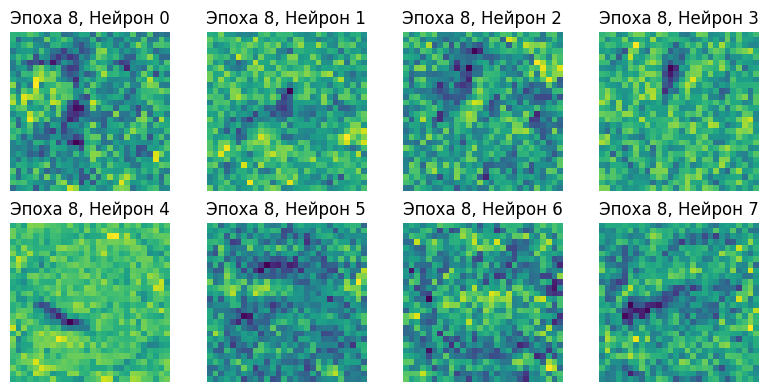

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9783 - loss: 0.0682 - val_accuracy: 0.9741 - val_loss: 0.0875 - learning_rate: 0.0010
Epoch 9/20
405/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9774 - loss: 0.0708
Эпоха 9 - Таблицы весов:

Слой: h_128
Матрица весов:
        0         1         2         3         4         5         6    \
0  0.040833  0.006769  0.053378  0.014670 -0.043691  0.046577 -0.012092   
1  0.036694 -0.004013 -0.044545  0.031292  0.009765  0.078405  0.024457   
2  0.040159  0.080075  0.001007  0.050227 -0.080195 -0.061896  0.002116   
3  0.075266 -0.027484  0.069151 -0.069895  0.079566  0.006785 -0.046291   
4  0.051493 -0.042883  0.029019 -0.049312  0.069005  0.061613 -0.004877   

        7         8         9    ...       118       119       120       121  \
0 -0.014228 -0.018582 -0.037774  ...  0.015626 -0.067553  0.052906 -0.037754   
1  0.033160  0.054840  0.050886  ... -0.013101 -0.043395  0.080793  0.041851   
2  0.032615  0.001453  0.0230

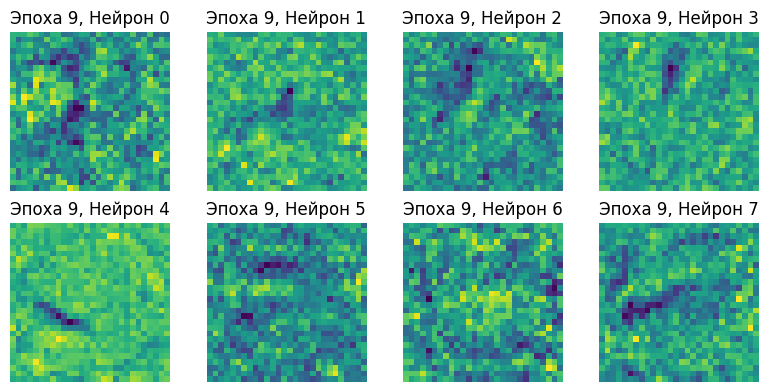

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9776 - loss: 0.0703 - val_accuracy: 0.9771 - val_loss: 0.0831 - learning_rate: 0.0010
Epoch 10/20
413/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9790 - loss: 0.0641
Эпоха 10 - Таблицы весов:

Слой: h_128
Матрица весов:
        0         1         2         3         4         5         6    \
0  0.040833  0.006769  0.053378  0.014670 -0.043691  0.046577 -0.012092   
1  0.036694 -0.004013 -0.044545  0.031292  0.009765  0.078405  0.024457   
2  0.040159  0.080075  0.001007  0.050227 -0.080195 -0.061896  0.002116   
3  0.075266 -0.027484  0.069151 -0.069895  0.079566  0.006785 -0.046291   
4  0.051493 -0.042883  0.029019 -0.049312  0.069005  0.061613 -0.004877   

        7         8         9    ...       118       119       120       121  \
0 -0.014228 -0.018582 -0.037774  ...  0.015626 -0.067553  0.052906 -0.037754   
1  0.033160  0.054840  0.050886  ... -0.013101 -0.043395  0.080793  0.041851   
2  0.032615  0.001453  0.02

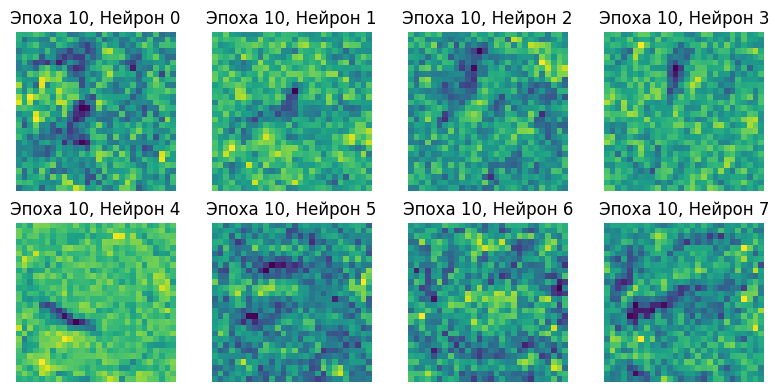

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9790 - loss: 0.0638 - val_accuracy: 0.9749 - val_loss: 0.0861 - learning_rate: 0.0010
Epoch 11/20
422/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9811 - loss: 0.0559
Эпоха 11 - Таблицы весов:

Слой: h_128
Матрица весов:
        0         1         2         3         4         5         6    \
0  0.040833  0.006769  0.053378  0.014670 -0.043691  0.046577 -0.012092   
1  0.036694 -0.004013 -0.044545  0.031292  0.009765  0.078405  0.024457   
2  0.040159  0.080075  0.001007  0.050227 -0.080195 -0.061896  0.002116   
3  0.075266 -0.027484  0.069151 -0.069895  0.079566  0.006785 -0.046291   
4  0.051493 -0.042883  0.029019 -0.049312  0.069005  0.061613 -0.004877   

        7         8         9    ...       118       119       120       121  \
0 -0.014228 -0.018582 -0.037774  ...  0.015626 -0.067553  0.052906 -0.037754   
1  0.033160  0.054840  0.050886  ... -0.013101 -0.043395  0.080793  0.041851   
2  0.032615  0.001453  0.02

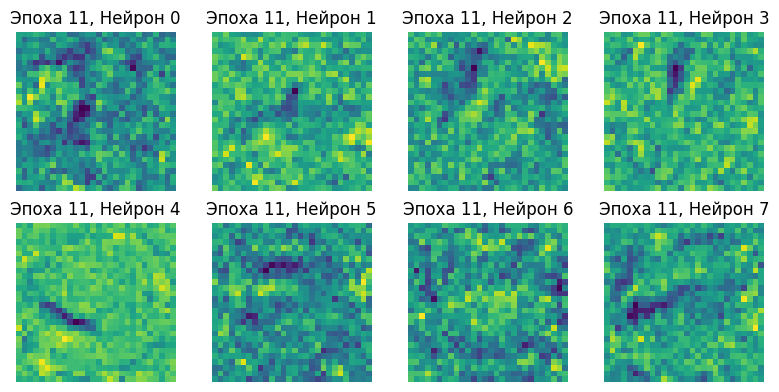

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9812 - loss: 0.0558 - val_accuracy: 0.9782 - val_loss: 0.0798 - learning_rate: 0.0010
Epoch 12/20
418/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9832 - loss: 0.0530
Эпоха 12 - Таблицы весов:

Слой: h_128
Матрица весов:
        0         1         2         3         4         5         6    \
0  0.040833  0.006769  0.053378  0.014670 -0.043691  0.046577 -0.012092   
1  0.036694 -0.004013 -0.044545  0.031292  0.009765  0.078405  0.024457   
2  0.040159  0.080075  0.001007  0.050227 -0.080195 -0.061896  0.002116   
3  0.075266 -0.027484  0.069151 -0.069895  0.079566  0.006785 -0.046291   
4  0.051493 -0.042883  0.029019 -0.049312  0.069005  0.061613 -0.004877   

        7         8         9    ...       118       119       120       121  \
0 -0.014228 -0.018582 -0.037774  ...  0.015626 -0.067553  0.052906 -0.037754   
1  0.033160  0.054840  0.050886  ... -0.013101 -0.043395  0.080793  0.041851   
2  0.032615  0.001453  0.02

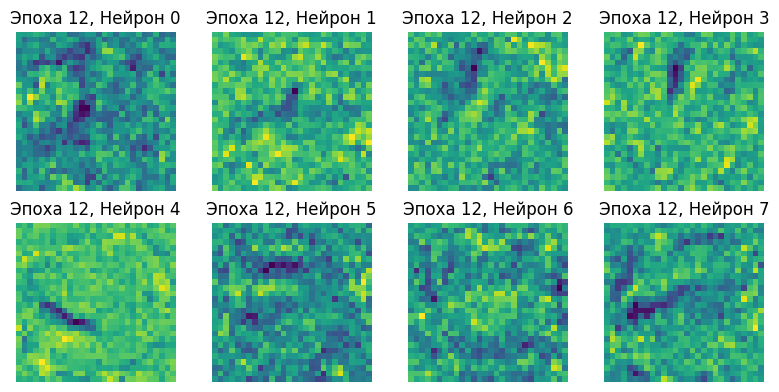

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9832 - loss: 0.0528 - val_accuracy: 0.9761 - val_loss: 0.0857 - learning_rate: 0.0010
Epoch 13/20
416/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9818 - loss: 0.0539
Эпоха 13 - Таблицы весов:

Слой: h_128
Матрица весов:
        0         1         2         3         4         5         6    \
0  0.040833  0.006769  0.053378  0.014670 -0.043691  0.046577 -0.012092   
1  0.036694 -0.004013 -0.044545  0.031292  0.009765  0.078405  0.024457   
2  0.040159  0.080075  0.001007  0.050227 -0.080195 -0.061896  0.002116   
3  0.075266 -0.027484  0.069151 -0.069895  0.079566  0.006785 -0.046291   
4  0.051493 -0.042883  0.029019 -0.049312  0.069005  0.061613 -0.004877   

        7         8         9    ...       118       119       120       121  \
0 -0.014228 -0.018582 -0.037774  ...  0.015626 -0.067553  0.052906 -0.037754   
1  0.033160  0.054840  0.050886  ... -0.013101 -0.043395  0.080793  0.041851   
2  0.032615  0.001453  0.02

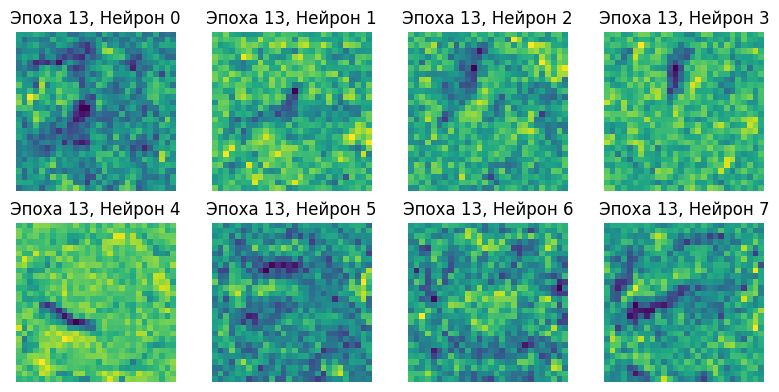

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9819 - loss: 0.0536 - val_accuracy: 0.9779 - val_loss: 0.0820 - learning_rate: 0.0010
Epoch 14/20
428/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9864 - loss: 0.0421
Эпоха 14 - Таблицы весов:

Слой: h_128
Матрица весов:
        0         1         2         3         4         5         6    \
0  0.040833  0.006769  0.053378  0.014670 -0.043691  0.046577 -0.012092   
1  0.036694 -0.004013 -0.044545  0.031292  0.009765  0.078405  0.024457   
2  0.040159  0.080075  0.001007  0.050227 -0.080195 -0.061896  0.002116   
3  0.075266 -0.027484  0.069151 -0.069895  0.079566  0.006785 -0.046291   
4  0.051493 -0.042883  0.029019 -0.049312  0.069005  0.061613 -0.004877   

        7         8         9    ...       118       119       120       121  \
0 -0.014228 -0.018582 -0.037774  ...  0.015626 -0.067553  0.052906 -0.037754   
1  0.033160  0.054840  0.050886  ... -0.013101 -0.043395  0.080793  0.041851   
2  0.032615  0.001453  0.02

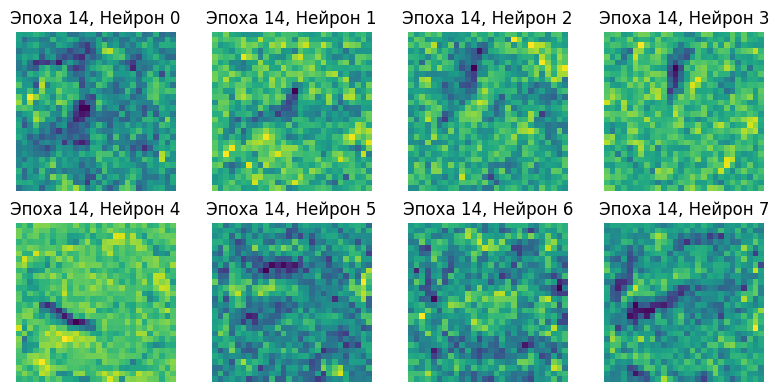

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9865 - loss: 0.0420 - val_accuracy: 0.9803 - val_loss: 0.0756 - learning_rate: 5.0000e-04
Epoch 15/20
412/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9898 - loss: 0.0332
Эпоха 15 - Таблицы весов:

Слой: h_128
Матрица весов:
        0         1         2         3         4         5         6    \
0  0.040833  0.006769  0.053378  0.014670 -0.043691  0.046577 -0.012092   
1  0.036694 -0.004013 -0.044545  0.031292  0.009765  0.078405  0.024457   
2  0.040159  0.080075  0.001007  0.050227 -0.080195 -0.061896  0.002116   
3  0.075266 -0.027484  0.069151 -0.069895  0.079566  0.006785 -0.046291   
4  0.051493 -0.042883  0.029019 -0.049312  0.069005  0.061613 -0.004877   

        7         8         9    ...       118       119       120       121  \
0 -0.014228 -0.018582 -0.037774  ...  0.015626 -0.067553  0.052906 -0.037754   
1  0.033160  0.054840  0.050886  ... -0.013101 -0.043395  0.080793  0.041851   
2  0.032615  0.001453  

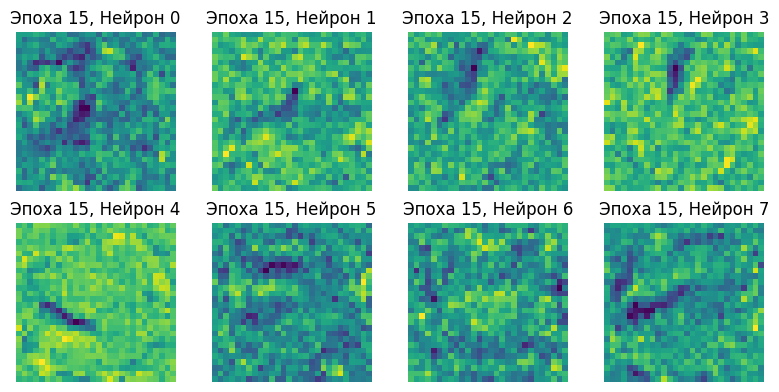

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9898 - loss: 0.0331 - val_accuracy: 0.9789 - val_loss: 0.0797 - learning_rate: 5.0000e-04
Epoch 16/20
429/438 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9892 - loss: 0.0332
Эпоха 16 - Таблицы весов:

Слой: h_128
Матрица весов:
        0         1         2         3         4         5         6    \
0  0.040833  0.006769  0.053378  0.014670 -0.043691  0.046577 -0.012092   
1  0.036694 -0.004013 -0.044545  0.031292  0.009765  0.078405  0.024457   
2  0.040159  0.080075  0.001007  0.050227 -0.080195 -0.061896  0.002116   
3  0.075266 -0.027484  0.069151 -0.069895  0.079566  0.006785 -0.046291   
4  0.051493 -0.042883  0.029019 -0.049312  0.069005  0.061613 -0.004877   

        7         8         9    ...       118       119       120       121  \
0 -0.014228 -0.018582 -0.037774  ...  0.015626 -0.067553  0.052906 -0.037754   
1  0.033160  0.054840  0.050886  ... -0.013101 -0.043395  0.080793  0.041851   
2  0.032615  0.001453  

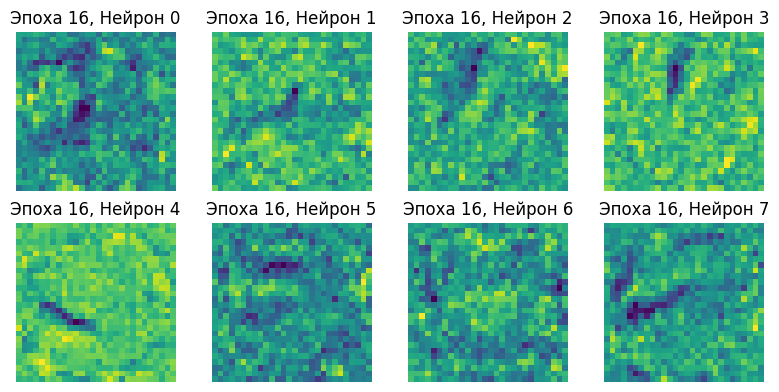

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9892 - loss: 0.0332 - val_accuracy: 0.9795 - val_loss: 0.0787 - learning_rate: 5.0000e-04
Epoch 17/20
427/438 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9908 - loss: 0.0292
Эпоха 17 - Таблицы весов:

Слой: h_128
Матрица весов:
        0         1         2         3         4         5         6    \
0  0.040833  0.006769  0.053378  0.014670 -0.043691  0.046577 -0.012092   
1  0.036694 -0.004013 -0.044545  0.031292  0.009765  0.078405  0.024457   
2  0.040159  0.080075  0.001007  0.050227 -0.080195 -0.061896  0.002116   
3  0.075266 -0.027484  0.069151 -0.069895  0.079566  0.006785 -0.046291   
4  0.051493 -0.042883  0.029019 -0.049312  0.069005  0.061613 -0.004877   

        7         8         9    ...       118       119       120       121  \
0 -0.014228 -0.018582 -0.037774  ...  0.015626 -0.067553  0.052906 -0.037754   
1  0.033160  0.054840  0.050886  ... -0.013101 -0.043395  0.080793  0.041851   
2  0.032615  0.001453  

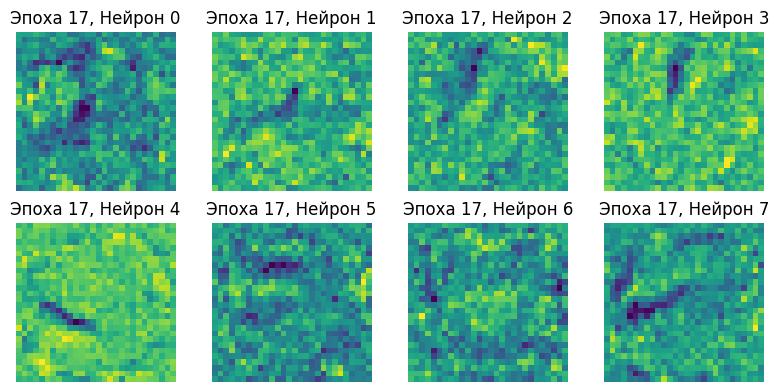

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9908 - loss: 0.0291 - val_accuracy: 0.9798 - val_loss: 0.0760 - learning_rate: 2.5000e-04


In [40]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=128,
                    callbacks=[early_stop, reduce_lr, weight_logger, neuron_visualizer])

In [41]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Точность на тестовой выборке:", test_accuracy)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.9802 - loss: 0.0734
Точность на тестовой выборке: 0.9802857041358948


In [46]:
y_pred = np.argmax(model.predict(X_test), axis=1)
print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1413
           1       0.99      0.99      0.99      1574
           2       0.98      0.97      0.98      1358
           3       0.98      0.98      0.98      1421
           4       0.98      0.98      0.98      1384
           5       0.98      0.98      0.98      1243
           6       0.99      0.98      0.99      1387
           7       0.98      0.98      0.98      1469
           8       0.98      0.97      0.98      1348
           9       0.97      0.98      0.97      1403

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000

Confusion Matrix
[[1400    0    1    0    1    1    2    1    6    1]
 [   0 1555    4    3    0    1    2    3    4    2]
 [   7    3 1324    6    6    1    1    5    4    

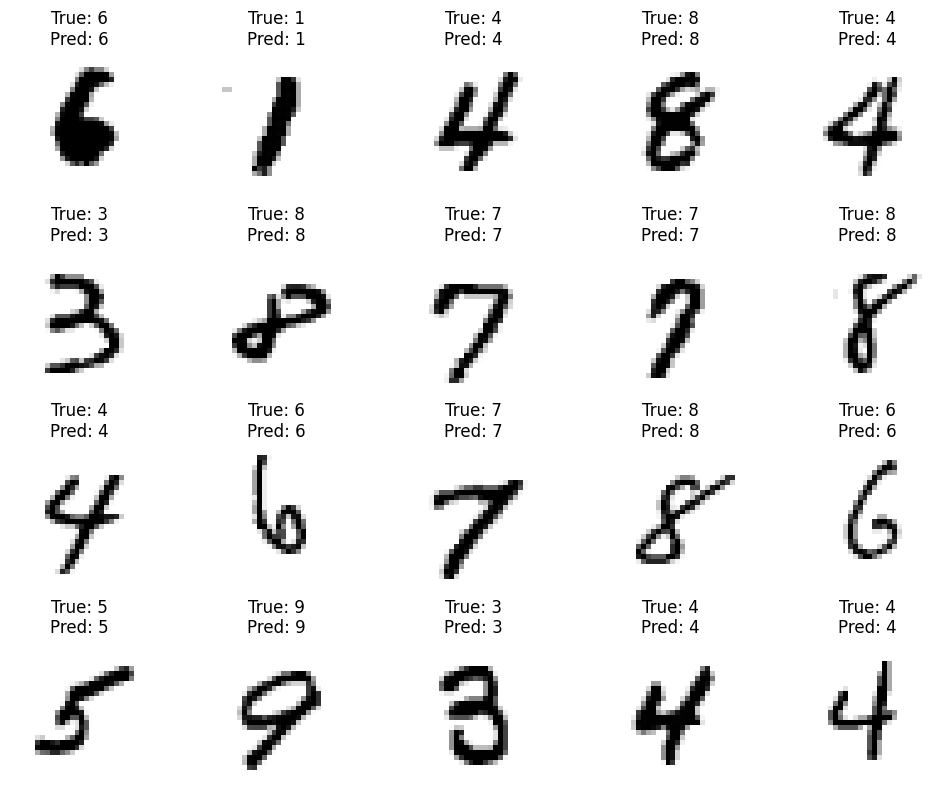

In [43]:
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
axes = axes.ravel()
for ax, image, true_label, pred_label in zip(axes, X_test, y_test, y_pred):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r)
    ax.set_title(f"True: {true_label}\nPred: {pred_label}")
    ax.axis('off')
plt.tight_layout()
plt.show()